In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
fish_datasheet = pd.read_csv("Fish.csv")
fish_datasheet.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [112]:
fish_datasheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [113]:
fish_datasheet.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [114]:
correlation_matrix = fish_datasheet.corr(method= "pearson")
correlation_matrix

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


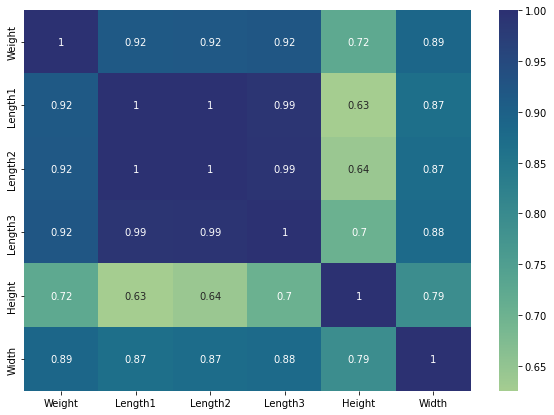

In [115]:
fig, axs = plt.subplots(figsize = (10, 7))
sns.heatmap(correlation_matrix, cmap= "crest", annot= True)
plt.savefig(f'fish_images/Heatmap of correlation matrix for fish dataset', dpi=300, bbox_inches='tight')
plt.show()

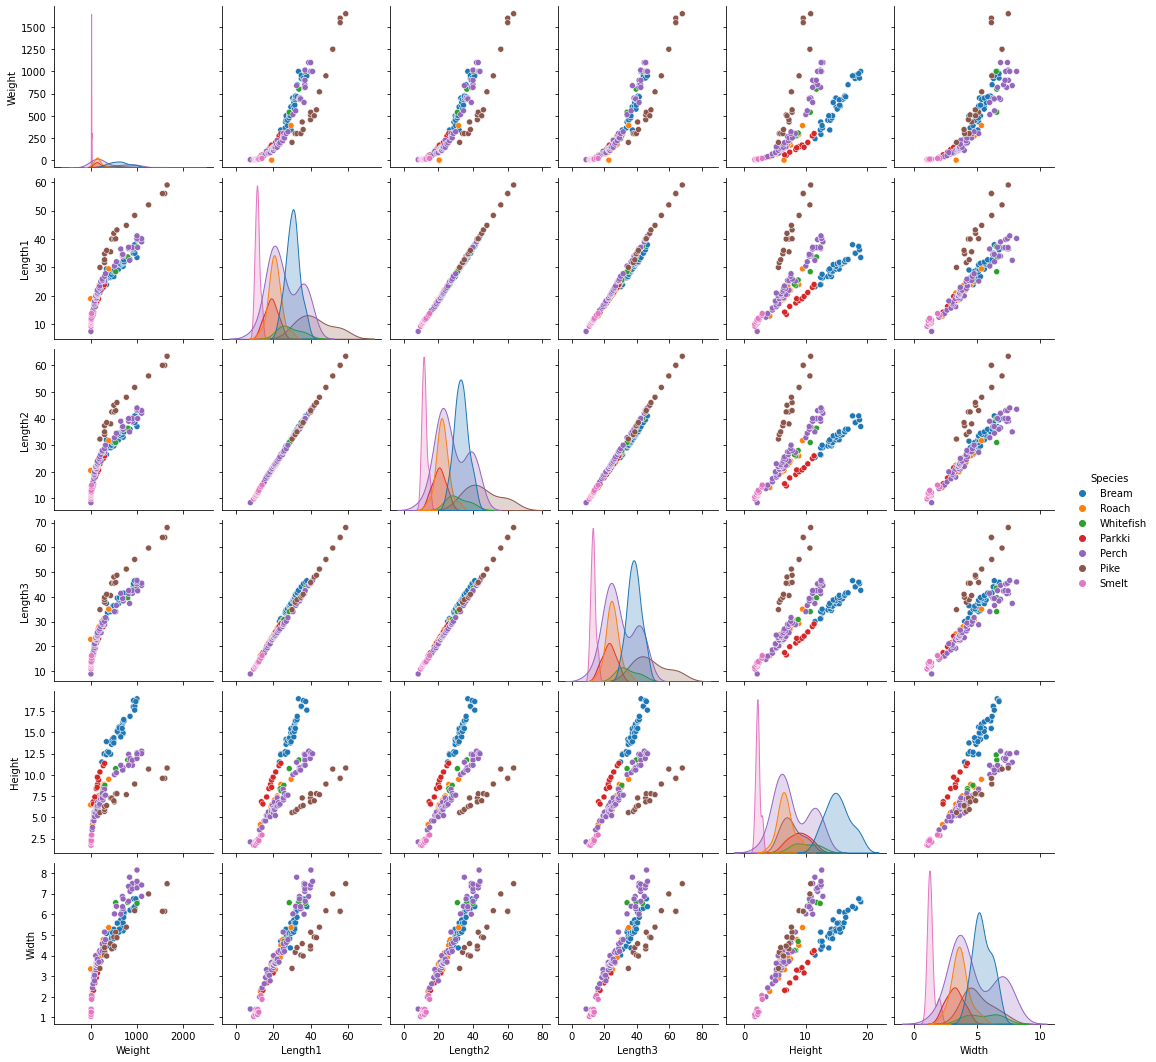

In [116]:
sns.pairplot(data= fish_datasheet, hue= "Species")
plt.savefig(f'fish_images/pairplot for fish dataset', dpi=300, bbox_inches='tight')
plt.show()

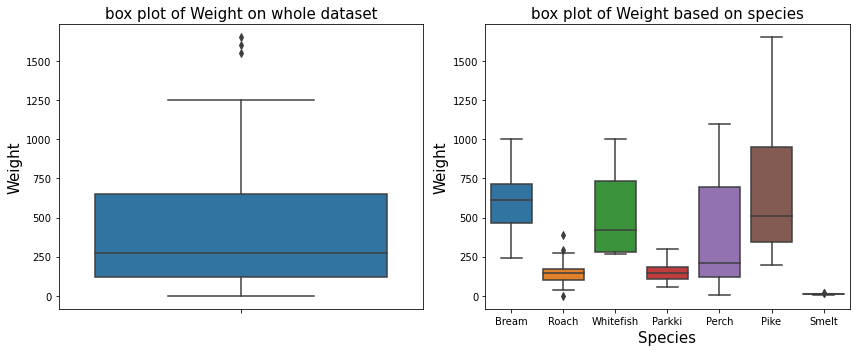

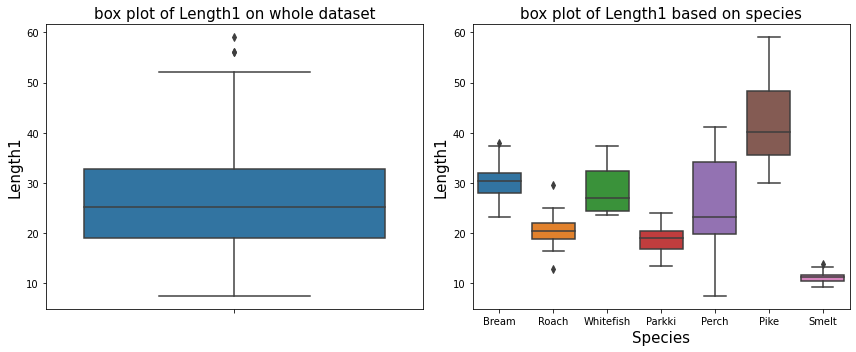

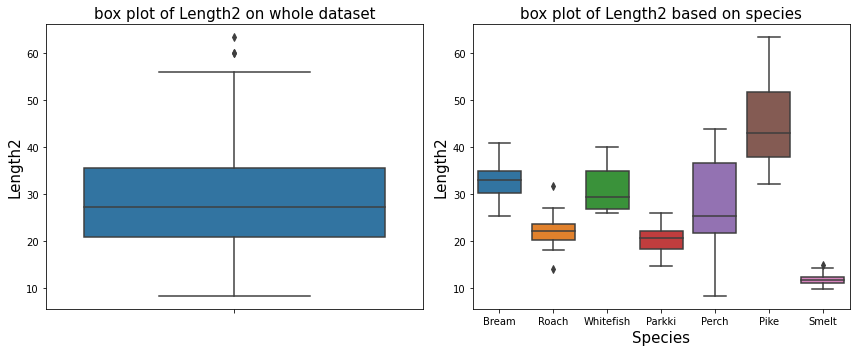

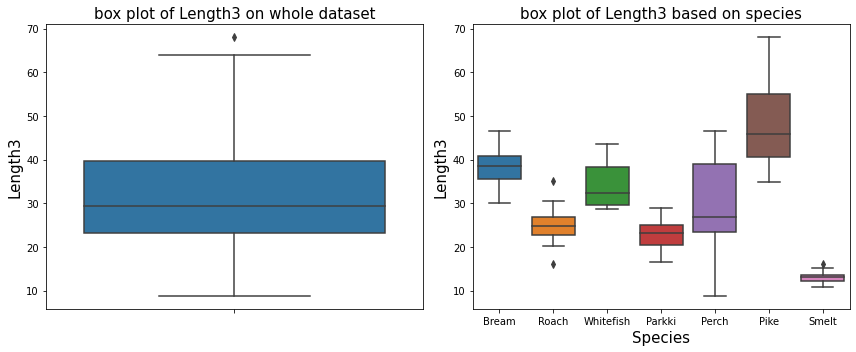

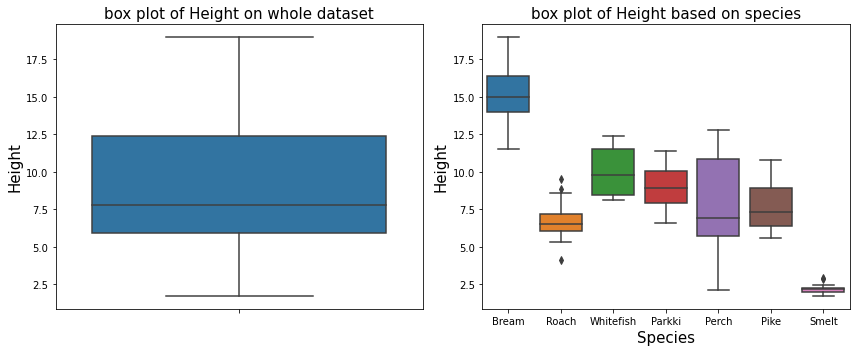

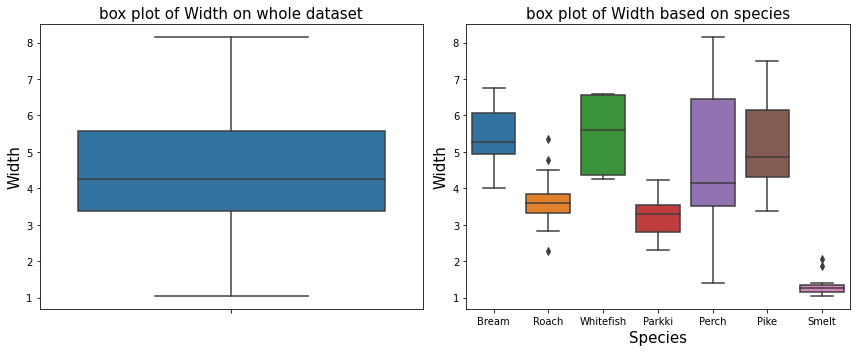

In [117]:
for columnName in (fish_datasheet.select_dtypes("number").columns):
    fig, axs = plt.subplots(1,2, figsize = (12, 5))
    
    sns.boxplot(data= fish_datasheet, y= columnName , hue= "Species", ax= axs[0])
    axs[0].set_title(f'box plot of {columnName} on whole dataset', fontsize = 15)
    axs[0].set_ylabel(columnName, fontsize = 15)

    sns.boxplot(data= fish_datasheet, x = "Species", y= columnName, ax= axs[1])
    axs[1].set_title(f'box plot of {columnName} based on species', fontsize = 15)
    axs[1].set_ylabel(columnName, fontsize = 15)
    axs[1].set_xlabel("Species", fontsize = 15)
    plt.tight_layout()
    plt.savefig(f'fish_images/box plot of {columnName}', dpi=300, bbox_inches='tight')
    plt.show()


In [118]:
#Data cleaning, Outlier data removal from each features based on species. 
def remove_outliers(group):
    numeric_columns = group.select_dtypes('number').columns
    for col in numeric_columns:
        quartile1 = group[col].quantile(0.25)
        quartile3 = group[col].quantile(0.75)
        inter_quartile_range = quartile3 - quartile1
        lower_bound = quartile1 - 1.5 * inter_quartile_range
        upper_bound = quartile3 + 1.5 * inter_quartile_range
        group = group[(group[col] >= lower_bound) & (group[col] <= upper_bound)]
    return group

fish_datasheet_without_outlier = fish_datasheet.groupby("Species").apply(remove_outliers).reset_index(drop=True)
fish_datasheet_without_outlier.shape

(151, 7)

In [119]:
#Feature selection (Selecting feature with maximum correlation coefficient with target variable "Weight")
target_correlation = correlation_matrix['Weight']

target_correlation = target_correlation.drop(labels=['Weight'])

max_correlation_index = target_correlation.abs().idxmax()
max_correlation_value = target_correlation[max_correlation_index]
print(f"{max_correlation_index}: {max_correlation_value}")


Length3: 0.923043559362012


In [120]:
#Aggregate Data Analysis:
final_output_df = pd.DataFrame(columns=["Algorithm and Datatype", "R²", "Mean Square Error"])


In [121]:
# #Preparing training data and test data for univariate linear regression 
# X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate = train_test_split(
#     fish_datasheet[["Length3"]], 
#     fish_datasheet[["Weight"]], 
#     test_size=0.2, 
#     random_state=42
#     )

# #Univariate Standardization
# univariate_scaler = StandardScaler()
# X_train_univariate_standardized = univariate_scaler.fit_transform(X_train_univariate)
# X_test_univariate_standardized = univariate_scaler.transform(X_test_univariate)


In [122]:
# #univariate linear regression on original dataset (LSTAT vs MEDV)
# univariate_linear_model = LinearRegression().fit(X_train_univariate, y_train_univariate)
# y_test_univariate_predicted = univariate_linear_model.predict(X_test_univariate)

# #Univariate linear regression on standardized dataset
# standardized_univariate_linear_model = LinearRegression().fit(X_train_univariate_standardized, y_train_univariate)
# y_test_univariate_standardized_predicted = standardized_univariate_linear_model.predict(X_test_univariate_standardized)


In [123]:
# #Univariate linear regression on original dataset and standardized dataset
# print(f"Univariate/Simple Linear Regression between '{max_correlation_index}' and 'Weight' \n")
# dataset_types = ['Original dataset', 'standardized_dataset']
# univariate_predictions = [y_test_univariate_predicted, y_test_univariate_standardized_predicted]
# for dataset_type, y_pred in zip(dataset_types, univariate_predictions):
#     final_output_df = pd.concat(
#         [final_output_df,
#         pd.DataFrame(
#             np.array(
#                 [[f"univariate on {dataset_type}",
#                 r2_score(y_test_univariate, y_pred),
#                 mean_squared_error(y_test_univariate, y_pred)]]
#                 ),
#             columns=["Algorithm and Datatype", "R²", "Mean Square Error"]
#             )],
#         ignore_index=True
#         )
#     print(f"Univariate Regression R^2 score for {dataset_type}: {r2_score(y_test_univariate, y_pred):.4f}")
#     print(f"Univariate Regression MSE for {dataset_type}: {mean_squared_error(y_test_univariate, y_pred):.4f}\n")

In [124]:
#Trying to predict multivariate linear regression to predict the weight based on length, width and height provided based on original dataset.

X_train, X_test, y_train, y_test = train_test_split(fish_datasheet.drop(columns=["Weight", "Species"]), fish_datasheet[["Weight"]], test_size=0.2, random_state=42)

linear_model = LinearRegression().fit(X_train, y_train)

y_predicted = linear_model.predict(X_test)


In [125]:
#linear regression on original datase
print(f"Linear Regression on original fish dataset \n")
final_output_df = pd.concat(
    [final_output_df,
    pd.DataFrame(
        np.array(
            [[f"Linear Regression",
            r2_score(y_test, y_predicted),
            mean_squared_error(y_test, y_predicted)]]
            ),
        columns=["Algorithm and Datatype", "R²", "Mean Square Error"]
        )],
    ignore_index=True
    )
print(f"Linear Regression R^2 score for original dataset: {r2_score(y_test, y_predicted):.4f}")
print(f"Linear Regression MSE for original dataset: {mean_squared_error(y_test, y_predicted):.4f}\n")

Linear Regression on original fish dataset 

Linear Regression R^2 score for original dataset: 0.8821
Linear Regression MSE for original dataset: 16763.8872



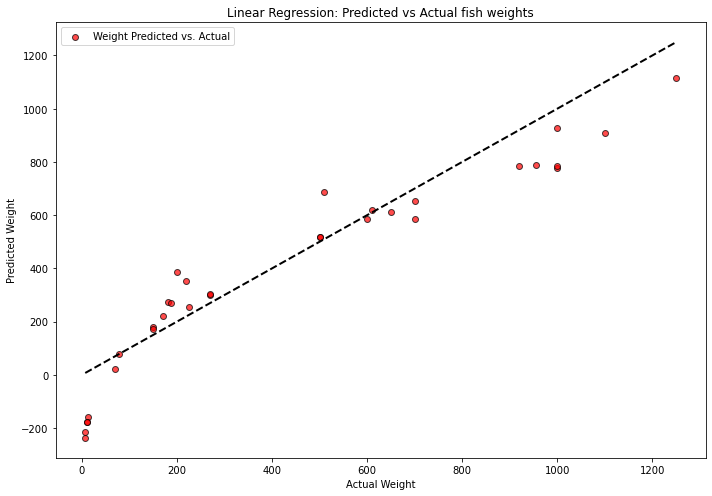

In [126]:
fig, axs = plt.subplots(figsize=(10, 7))
plt.scatter(y_test, y_predicted, color='red', edgecolor='k', alpha=0.7, label='Weight Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title(f'Linear Regression: Predicted vs Actual fish weights')
plt.legend()
plt.tight_layout()
plt.savefig(f'fish_images/scatter plot between predicted vs actual weights on linear regression', dpi=300, bbox_inches='tight')
plt.show()

Report the coefficients values by using the standard Least Square Estimates.

In [127]:
print(f"Coefficient of bias: {linear_model.intercept_}")
print(f"Coefficient of independent features are as follow:")
for columnName, coefficientValue in zip(X_train.columns, linear_model.coef_.flatten()):
    print(f"{columnName}: {coefficientValue}")

Coefficient of bias: [-515.30565134]
Coefficient of independent features are as follow:
Length1: 43.53526490090442
Length2: 7.821796237435786
Length3: -25.256701049424898
Height: 23.228912302555106
Width: 27.066492939430507


In [128]:
#Linear regression model fit on clean dataset
X_train_without_outlier, X_test_without_outlier, y_train_without_outlier, y_test_without_outlier = train_test_split(fish_datasheet_without_outlier.drop(columns=["Weight", "Species"]), fish_datasheet_without_outlier[["Weight"]], test_size=0.2, random_state=42)

linear_model_without_outlier = LinearRegression().fit(X_train_without_outlier, y_train_without_outlier)

y_predicted_without_outlier = linear_model_without_outlier.predict(X_test_without_outlier)

In [129]:
#linear regression on dataset without outlier
print(f"Linear Regression on fish dataset after outlier removal \n")
final_output_df = pd.concat(
    [final_output_df,
    pd.DataFrame(
        np.array(
            [[f"Linear Regression without outlier",
            r2_score(y_test_without_outlier, y_predicted_without_outlier),
            mean_squared_error(y_test_without_outlier, y_predicted_without_outlier)]]
            ),
        columns=["Algorithm and Datatype", "R²", "Mean Square Error"]
        )],
    ignore_index=True
    )
print(f"Linear Regression R^2 score for original dataset after outlier removal: {r2_score(y_test_without_outlier, y_predicted_without_outlier):.4f}")
print(f"Linear Regression MSE for dataset after outlier removal: {mean_squared_error(y_test_without_outlier, y_predicted_without_outlier):.4f}\n")

Linear Regression on fish dataset after outlier removal 

Linear Regression R^2 score for original dataset after outlier removal: 0.8676
Linear Regression MSE for dataset after outlier removal: 17252.5552



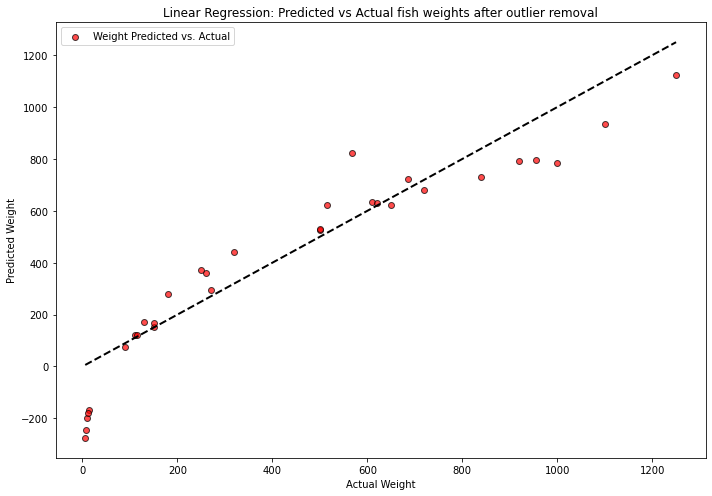

In [130]:
fig, axs = plt.subplots(figsize=(10, 7))
plt.scatter(y_test_without_outlier, y_predicted_without_outlier, color='red', edgecolor='k', alpha=0.7, label='Weight Predicted vs. Actual')
plt.plot([y_test_without_outlier.min(), y_test_without_outlier.max()], [y_test_without_outlier.min(), y_test_without_outlier.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title(f'Linear Regression: Predicted vs Actual fish weights after outlier removal')
plt.legend()
plt.tight_layout()
plt.savefig(f'fish_images/scatter plot between predicted vs actual weights on linear regression after outlier removal', dpi=300, bbox_inches='tight')
plt.show()

In [131]:
print(f"Coefficient of bias: {linear_model_without_outlier.intercept_}")
print(f"Coefficient of independent features are as follow:")
for columnName, coefficientValue in zip(X_train.columns, linear_model_without_outlier.coef_.flatten()):
    print(f"{columnName}: {coefficientValue}")

Coefficient of bias: [-531.85197571]
Coefficient of independent features are as follow:
Length1: 68.58979179125188
Length2: -12.570463876451923
Length3: -28.264269433000184
Height: 26.149790054988426
Width: 28.944391554294292


In [132]:
# import statsmodels.api as sm

# #Standard Error calculation:
# y_predicted_train = linear_model.predict(X_train)
# residuals_train = y_train - y_predicted_train
# sum_of_squared_residuals_train = np.sum(residuals_train ** 2)


# residuals_test = y_test - y_predicted
# sum_of_squared_residuals_test = np.sum(residuals_test ** 2)
# total_number_of_training_set = len(y_test)
# total_number_of_features = len(X_train.columns)

# X_design = np.hstack((np.ones((X_train.shape[0], 1)), X_train)) 
# X_inv = np.linalg.inv(np.matmul(X_design.transpose(), X_design))

# print("X_design shape:", X_design.shape)
# print("X_design shape:", y_train.shape)
# # a = np.matmul(X_design.transpose(), y_train)
# a = np.matmul(X_inv, X_design.transpose())
# coefficients = np.matmul(a, y_train)
# coefficients
# # #Standard error of the regression modelX_inv
# # standard_error_train = np.sqrt(sum_of_squared_residuals_train/(total_number_of_training_set - total_number_of_features - 1))
# # print(f"Standard error of the regression model: {standard_error_train}")

# # X_design = np.hstack((np.ones((X_train.shape[0], 1)), X_train)) 
# # # X_design = sm.add_constant(X_train)
# # print(X_design)
# # X_inv = np.linalg.inv(np.matmul(X_design.transpose(), X_design))

# # coef_se = standard_error_train.values * X_inv

# # print("Coeff:", coef_se)


# # #Standard error of each coefficients:
# # X_mean = np.mean(X_train)
# # X_variance = np.sum((X_train - X_mean)**2)
# # standard_error_coefficients = standard_error_train.values/ np.sqrt(X_variance)
# # print(f"Standard error for the coefficients: \n{coef_se}")

# # total_sum_of_squares = np.sum((y_test - np.mean(y_test))** 2)

# # r_squared_linear_model = 1 - sum_of_squared_residuals_test/total_sum_of_squares
# # print(f"Calculated R-Squared value: {r_squared_linear_model}")

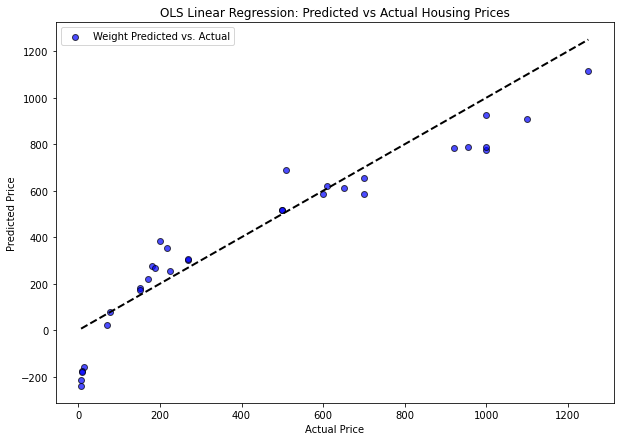

In [133]:
import statsmodels.api as sm

# OLS method Implementation on original dataset
X_train_with_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_with_const).fit()

X_test_with_const = sm.add_constant(X_test)
y_predicted_ols = ols_model.predict(X_test_with_const)

fig, axs = plt.subplots(figsize=(10, 7))
plt.scatter(y_test, y_predicted_ols, color='blue', edgecolor='k', alpha=0.7, label='Weight Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'OLS Linear Regression: Predicted vs Actual Housing Prices')
plt.legend()
plt.show()

In [134]:
#OLS linear regression on dataset
print(f"OLS Regression on fish dataset \n")
final_output_df = pd.concat(
    [final_output_df,
    pd.DataFrame(
        np.array(
            [[f"OLS Regression",
            r2_score(y_test, y_predicted_ols),
            mean_squared_error(y_test, y_predicted_ols)]]
            ),
        columns=["Algorithm and Datatype", "R²", "Mean Square Error"]
        )],
    ignore_index=True
    )
print(f"OLS Regression R^2 score for original dataset: {r2_score(y_test, y_predicted_ols):.4f}")
print(f"OLS Regression MSE for dataset: {mean_squared_error(y_test, y_predicted_ols):.4f}\n")

OLS Regression on fish dataset 

OLS Regression R^2 score for original dataset: 0.8821
OLS Regression MSE for dataset: 16763.8872



In [135]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     184.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           8.10e-55
Time:                        02:45:17   Log-Likelihood:                -787.66
No. Observations:                 127   AIC:                             1587.
Df Residuals:                     121   BIC:                             1604.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -515.3057     34.226    -15.056      0.000    -583.065    -447.546
Length1       43.5353     47.315      0.920      0.359     -50.137     137.208
Length2        7.8218     48.891      0.160      0.873     -88.970     104.614
Length3      -25.2567     18.146     -1.392      0.167     -61.181      10.667
Height        23.2289      9.384      2.475      0.015       4.652      41.806
Width         27.0665     21.800      1.242      0.217     -16.093      70.226
==============================================================================
Omnibus:                       20.933   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.028
Skew:                           0.844   Prob(JB):                     3.02e-07
Kurtosis:                       4.680   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
ols_model.params

const     -515.305651
Length1     43.535265
Length2      7.821796
Length3    -25.256701
Height      23.228912
Width       27.066493
dtype: float64

In [137]:
ols_model.bse

const      34.226126
Length1    47.314867
Length2    48.890610
Length3    18.145682
Height      9.383530
Width      21.800296
dtype: float64

In [138]:
from sklearn.metrics import mean_squared_error, r2_score

models = ['OLS', 'Linear']
predictions = [y_predicted_ols, y_predicted]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

OLS Regression R^2 score: 0.8821
OLS Regression MSE: 16763.8872

Linear Regression R^2 score: 0.8821
Linear Regression MSE: 16763.8872



• Fit the Ridge and Lasso Regression Models

In [139]:
from sklearn.linear_model import RidgeCV, LassoCV

#using ridge model from sklearn
rigged_linear_model = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
y_test_predicted_ridge = rigged_linear_model.predict(X_test)

#using Lasso model from sklearn
lasso_linear_model = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], max_iter= 100000).fit(X_train, y_train.values.ravel())
y_test_predicted_lasso = lasso_linear_model.predict(X_test)


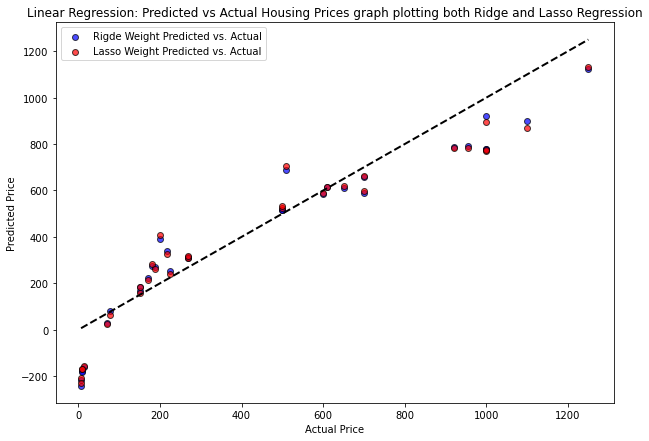

In [140]:
fig, axs = plt.subplots(figsize=(10, 7))
plt.scatter(y_test, y_test_predicted_ridge, color='blue', edgecolor='k', alpha=0.7, label='Rigde Weight Predicted vs. Actual')
plt.scatter(y_test, y_test_predicted_lasso, color='red', edgecolor='k', alpha=0.7, label='Lasso Weight Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression: Predicted vs Actual Housing Prices graph plotting both Ridge and Lasso Regression')
plt.legend()
plt.show()

In [141]:
print(f"Coefficient of variables in Ridge Linear Regression Model: \n{rigged_linear_model.coef_}")
print(f"Intercept value in Ridge Linear Regression Model: \n{rigged_linear_model.intercept_}")
print(f"Coefficient of variables in Lasso Linear Regression Model: \n{lasso_linear_model.coef_}")
print(f"Intercept value in Lasso Linear Regression Model: \n{lasso_linear_model.intercept_}")

Coefficient of variables in Ridge Linear Regression Model: 
[[ 27.03858344  17.69642626 -19.51672787  20.3581969   27.51531904]]
Intercept value in Ridge Linear Regression Model: 
[-518.43763297]
Coefficient of variables in Lasso Linear Regression Model: 
[24.91762755  0.1063255  -0.         13.44083754 29.06666741]
Intercept value in Lasso Linear Regression Model: 
-517.1502000635782


In [142]:

models = ['Ridge', 'Lasso']
predictions = [y_test_predicted_ridge, y_test_predicted_lasso]
for name, y_pred in zip(models, predictions):
    print(f"{name} Linear Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Linear Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

Ridge Linear Regression R^2 score: 0.8803
Ridge Linear Regression MSE: 17022.0223

Lasso Linear Regression R^2 score: 0.8774
Lasso Linear Regression MSE: 17431.9637



In [143]:
#Training, Test data standardization:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)


In [144]:
linear_model_with_scaled_data = LinearRegression().fit(X_train_scaled, y_train)
y_predicted_with_scaled_data = linear_model_with_scaled_data.predict(X_test_scaled)

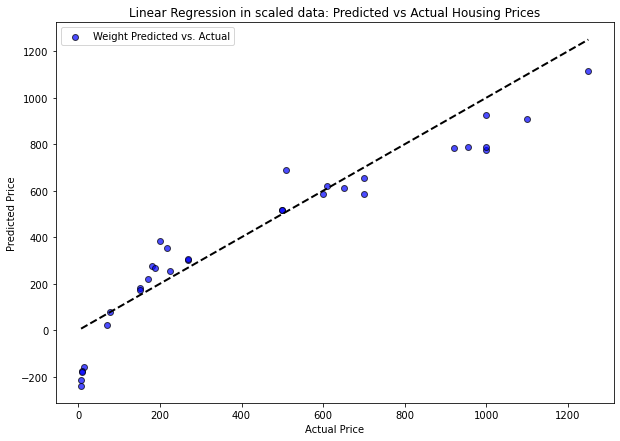

In [145]:
fig, axs = plt.subplots(figsize=(10, 7))
plt.scatter(y_test, y_predicted_with_scaled_data, color='blue', edgecolor='k', alpha=0.7, label='Weight Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression in scaled data: Predicted vs Actual Housing Prices')
plt.legend()
plt.show()

In [146]:
print(f"Coefficient of variables in Linear Regression Model using scaled data: \n{linear_model_with_scaled_data.coef_}")
print(f"Intercept value in Linear Regression Model using scaled data: \n{linear_model_with_scaled_data.intercept_}")

Coefficient of variables in Linear Regression Model using scaled data: 
[[ 432.27472554   83.01304108 -288.56797575   92.52321581   44.06740907]]
Intercept value in Linear Regression Model using scaled data: 
[386.79448819]
